In [186]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import PolynomialFeatures

First, we load the car dataset from csv.

In [187]:
car_data_table = pd.read_csv('../data/cars_com_clean.csv')

In [188]:
car_data_table.head()

,name,year,maker,price,seller_name,seller_phone,miles,exterior_color,interior_color,transmission,drivetrain,vin,id
0,2010 Mercedes-Benz GL 450 4MATIC,2010,Mercedes-Benz,15614.0,Kayser Ford Lincoln,(608) 807-5359,107545.0,Black,Cashmere,7-Speed Automatic,AWD,4JGBF7BEXAA543808,0
1,2015 Mercedes-Benz ML 350,2015,Mercedes-Benz,29998.0,CarMax Madison,(608) 286-3923,36642.0,Gray,Black,7-Speed Automatic w/OD,AWD,4JGDA5HB7FA445741,1
2,2013 Mercedes-Benz E 350 4MATIC,2013,Mercedes-Benz,16500.0,Lexus of Madison,(608) 478-2660,80614.0,Black,Black,7-Speed Automatic,AWD,WDDHF8JB7DA667069,2
3,2015 Mercedes-Benz C 300,2015,Mercedes-Benz,26988.0,Zimbrick Hyundai Eastside,(608) 338-1462,30090.0,Black,Black,7-Speed A/T,All Wheel Drive,55SWF4KB2FU026106,3
4,2015 Mercedes-Benz SLK 250,2015,Mercedes-Benz,29988.0,Zimbrick Hyundai Eastside,(608) 338-1462,25344.0,Black,Sahara Beige,7-Speed A/T,Rear Wheel Drive,WDDPK4HA2FF108712,4


In this study, we extract and analyze the correlation between car price versus miles for three luxury car models including Benz-E350, Lexus ES 350, and Audi A6. 

First, we query and clean the data for Benz-E350.

In [189]:
benz_cars = car_data_table.query('maker == "Mercedes-Benz"')
benz_E350 = benz_cars[benz_cars['name'].str.contains('E 350')].dropna(subset=['price'])
print (benz_E350.shape)


(85, 13)


For car with zero miles (meaning that the car is new), we average all new car prices, and insert a new row into the table for the new car.

In [190]:
benz_E350_new = benz_E350[(benz_E350['miles'] == 0)]
benz_E350_new_mean_price = benz_E350_new['price'].mean()
print ("The mean new car price for Benz-E35 car is: {}".format(benz_E350_new_mean_price))
benz_E350.loc[benz_E350.miles == 0, 'miles'] = np.NaN
benz_E350 = benz_E350.dropna(subset=['miles'])
E350_new_car_row = pd.DataFrame([['2018 Mercedes-Benz E 350 4MATIC',2018,'Mercedes-Benz',benz_E350_new_mean_price,np.NaN,np.NaN,0,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN]],columns=benz_E350.columns)
benz_E350 = benz_E350.append(E350_new_car_row,ignore_index=True)
print (benz_E350.shape)

The mean new car price for Benz-E35 car is: 64793.851851851854
(59, 13)


Similarly, we query and clean the data for ES 350.

In [191]:
Lexus_cars = car_data_table.query('maker == "Lexus"')
ES_350 = Lexus_cars[Lexus_cars['name'].str.contains('ES 350')].dropna(subset=['price'])
print (ES_350.shape)
ES_350_new = ES_350[(ES_350['miles'] == 0)]
ES_350_new_mean_price = ES_350_new['price'].mean()
print ("The mean new car price for ES_350 is: {}".format(ES_350_new_mean_price))
ES_350.loc[ES_350.miles == 0, 'miles'] = np.NaN
ES_350 = ES_350.dropna(subset=['miles'])
ES_350_new_car_row = pd.DataFrame([['2018 Lexus ES 350',2018,'Lexus',ES_350_new_mean_price,np.NaN,np.NaN,0,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN]],columns=ES_350.columns)
ES_350 = ES_350.append(ES_350_new_car_row, ignore_index=True)
print (ES_350.shape)


(108, 13)
The mean new car price for ES_350 is: 43835.565217391304
(63, 13)


Similarly, we query and clean the data for Audi A6.

In [192]:
Audi_cars = car_data_table.query('maker == "Audi"')
Audi_A6 = Audi_cars[Audi_cars['name'].str.contains('A6')].dropna(subset=['price'])
#Audi_A6['miles'].replace(0,np.NaN)
Audi_A6 = Audi_A6.dropna(subset=['miles'])
print (Audi_A6.shape)
Audi_A6.head()
Audi_A6_new = Audi_A6[(Audi_A6['miles'] == 0)]
Audi_A6_new_mean_price = Audi_A6_new['price'].mean()
print ("The mean new car price for Audi_A65 is: {}".format(Audi_A6_new_mean_price))
Audi_A6.loc[Audi_A6.miles == 0, 'miles'] = np.NaN
Audi_A6 = Audi_A6.dropna(subset=['miles'])
Audi_A6_new_car_row = pd.DataFrame([['2018 Audi A6 Premium quattro',2018,'Audi',Audi_A6_new_mean_price,np.NaN,np.NaN,0,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN]],columns=Audi_A6.columns)
Audi_A6 = Audi_A6.append(Audi_A6_new_car_row, ignore_index=True)
print (Audi_A6.shape)

(69, 13)
The mean new car price for Audi_A65 is: 61260.166666666664
(40, 13)


We plot all three sets of car data sets. In addition, we perform a ploynomial fit all the data sets.

AttributeError: module 'matplotlib' has no attribute 'plt'

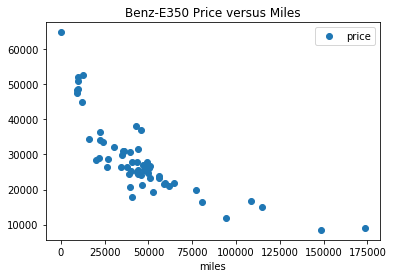

In [196]:
# plot Benz-E350
benz_E350.plot(x='miles', y='price', style='o',title="Benz-E350 Price versus Miles")
Benz_E350_fit = np.poly1d(np.polyfit(benz_E350['miles'], benz_E350['price'],2))
#print (Benz_E350_fit)
miles = np.linspace(0, 175000, 10000)
plt.plot(miles, Benz_E350_fit(miles))

# plot Lexus ES 350
ES_350.plot(x='miles', y='price', style='o',title="ES-350 Price versus Miles")
ES_350_fit = np.poly1d(np.polyfit(ES_350['miles'], ES_350['price'],2))
#print (ES_350_fit)
miles = np.linspace(0, 175000, 10000)
plt.plot(miles, ES_350_fit(miles))

# plot Audi A6
Audi_A6.plot(x='miles', y='price', style='o',title="Audi-A6 Price versus Miles")
Audi_A6_fit = np.poly1d(np.polyfit(Audi_A6['miles'], Audi_A6['price'],2))
#print (ES_350_fit)
miles = np.linspace(0, 125000, 10000)
plt.plot(miles, Audi_A6_fit(miles))

We compare the price decreasing date at different miles for three car models.

In [ ]:
# Benz-E350
Benz_decreasing_rate = np.poly1d.deriv(Benz_E350_fit)
# Lexus-ES350
ES_350_decreasing_rate = np.poly1d.deriv(ES_350_fit)
# Audi-A6
Audi_A6_decreasing_rate = np.poly1d.deriv(Audi_A6_fit)

Finally, ww plot the decreasing rate for visualization.

In [ ]:
miles = [20000, 40000, 60000, 80000, 100000]
Benz_decreasing_rates = [-Benz_decreasing_rate(i) for i in miles]
ES_350_decreasing_rates = [-ES_350_decreasing_rate(i) for i in miles]
Audi_A6_decreasing_rates = [-Audi_A6_decreasing_rate(i) for i in miles]
fig, ax = plt.subplots()
index = np.arange(len(miles))

bar_width = 0.3
plt.bar(index, Benz_decreasing_rates, bar_width, color='b')
plt.bar(index+bar_width, ES_350_decreasing_rates, bar_width, color='g')
plt.bar(index+2*bar_width, Audi_A6_decreasing_rates, bar_width, color='r')
plt.xticks(index, miles)
ax.legend(['Benz-E350','Lexus-ES350', 'Audi-A6'])
ax.set_title('Car price decreasing rate for Benz-E350, Lexus-ES350 and Audi-A6')

Some Insights:
1. Lexus ES350 is the most value-preserving car model among three types of luxury cars, based on the price decreasing plot. The Audi-A6 is the second value-preserving car.
2. As the car miles increases, the price decreasing rate of three car models converges to be nearly the same.
3. It is noted that this analysis is only performed a relatively small car dataset crawled within Madison area. Bias could exist, so that the price trend may not be most representative. More data analysis on a larger dataset could be more persuasive.